In [1]:
import pandas as pd
import numpy as np

In [56]:
user_data = pd.read_csv("train.csv")
user_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [58]:
occupations = user_data['Occupation'].unique()
products = user_data['Product_ID'].unique()
product_category_1 = user_data['Product_Category_1'].unique()
n_products = products.shape[0]
purchases = user_data["Purchase"]

In [64]:
purchases.describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: ylabel='Density'>

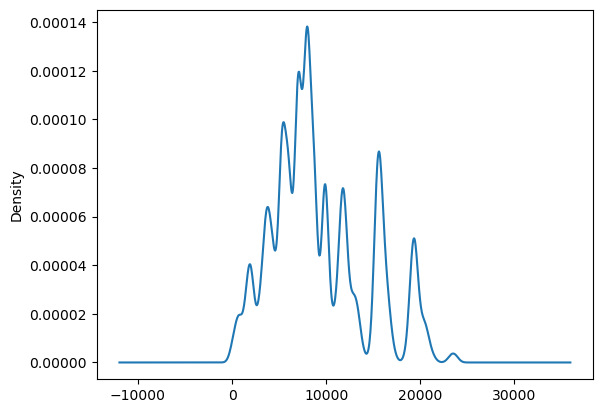

In [61]:
purchases.plot.density()